In [ ]:
!pip install healpy

In [ ]:
!pip install astropy

In [ ]:
import numpy as np
import pandas as pd
import healpy as hp
import matplotlib
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates.matrix_utilities import rotation_matrix
from astropy.coordinates import SkyCoord, CartesianRepresentation
from astropy.wcs import WCS
from astropy.visualization import astropy_mpl_style
import utility as util

In [ ]:
#Initializing all the variables.

NSIDE = 4096
NPIX  = hp.nside2npix(NSIDE)

og_df = pd.read_csv('simple_model_images_files_data.csv')

In [ ]:
df = og_df[(og_df['POINTING'] == 330)]

# Mosaic Wide (38) + Deep (7) Imaging Pattern

### Wide Imaging Pattern

In [ ]:
df_38 = util.translate_squares_custom_9x5_38(df)

/content/utility.py:987: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_pointing["remove"] = 0
/content/utility.py:987: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_pointing["remove"] = 0
/content/utility.py:987: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [ ]:
ra_cen_38 = df_38[[f'RA{i}' for i in range(1, 5)]].mean().mean()
dec_cen_38 = df_38[[f'DEC{i}' for i in range(1, 5)]].mean().mean()

print(f"RA: {ra_cen_38}; DEC: {dec_cen_38}")

RA: 9.929758150728556; DEC: -43.989593039552204


### Deep Imaging Pattern

In [ ]:
df_7 = util.translate_squares_custom_7(df)

In [ ]:
df_7_shifted = util.shift_centers(df_7, ra_cen_38, dec_cen_38)

In [ ]:
ra_cen_7 = df_7_shifted[[f'RA{i}' for i in range(1, 5)]].mean().mean()
dec_cen_7 = df_7_shifted[[f'DEC{i}' for i in range(1, 5)]].mean().mean()

print(f"RA: {ra_cen_7}; DEC: {dec_cen_7}")

RA: 9.929758150728556; DEC: -43.98959303955221


### Final pattern

In [ ]:
final_df = pd.concat([df_38, df_7_shifted], ignore_index=True)

In [ ]:
ra_cen = final_df[[f'RA{i}' for i in range(1, 5)]].mean().mean()
dec_cen = final_df[[f'DEC{i}' for i in range(1, 5)]].mean().mean()

print(f"RA: {ra_cen}; DEC: {dec_cen}")

RA: 9.929758150728556; DEC: -43.989593039552204


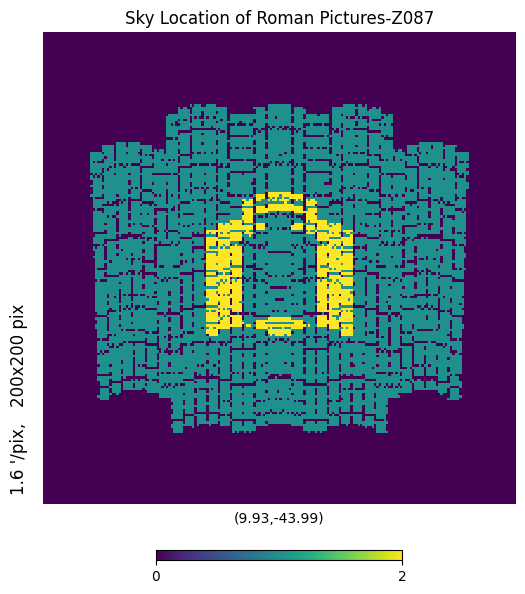

In [ ]:
util.visualize_healpy(final_df, ra_cen, dec_cen)

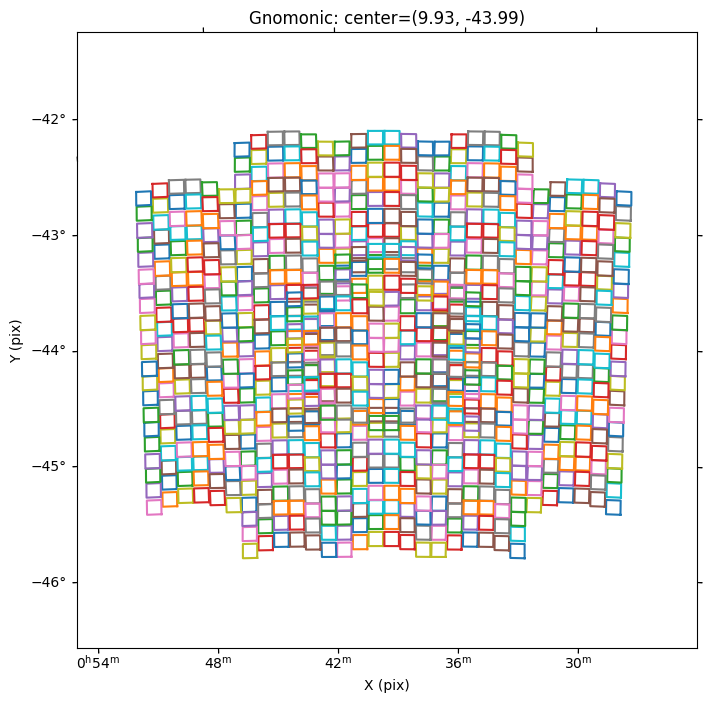

In [ ]:
util.visualize_astropy_plotcoord(final_df, ra_cen, dec_cen)

### Heat Map

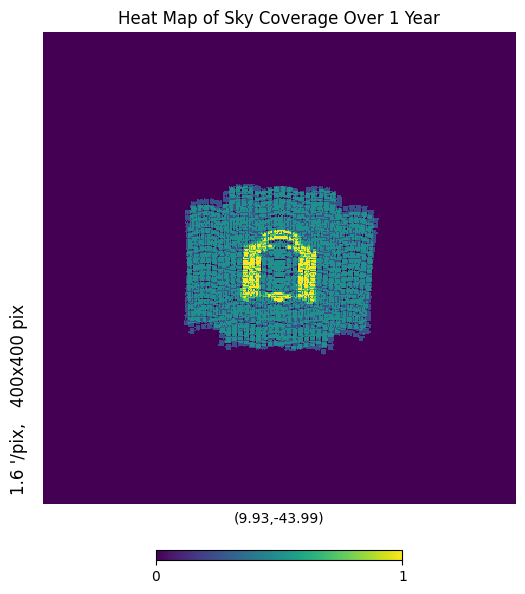

In [ ]:
heat_map = util.create_heat_map(final_df, ra_cen, dec_cen)

### Pixel Efficiency Calculation

In [ ]:
pixel_data, imaging_data = util.calculate_pixel_efficiency(final_df, ra_cen, dec_cen)

### CDF Plot

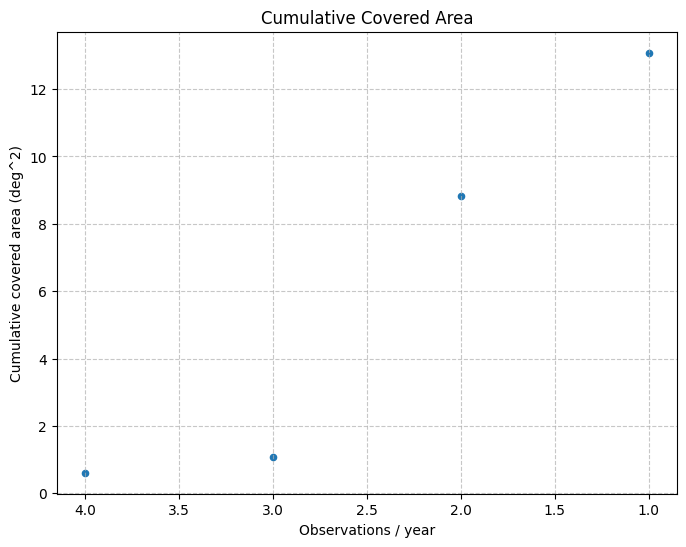

In [ ]:
util.cdf_calc(pixel_data)